### Global Solution - Data Science e Statistical
 
**Nomes + RM dos integrantes:**
- Guilherme Akio - 98582
- Fabrício Saavedra - 97631
 
**Turma:** 2ESPW
 
**Ano:** 2024

> Link do repositório: https://github.com/Fabr1c100/GS_2SEM_DataScience.git

___ 
### Descrição do Projeto
Este projeto tem como objetivo analisar a Pegada de Carbono de diversas nações, com foco no Brasil, e compará-lo com dados globais, da América Latina, da OCDE e dos Estados Unidos. A análise buscará entender como fatores como industrialização, consumo energético, desmatamento e eficiência energética impactam as emissões de carbono em diferentes países. Utilizando dados de fontes confiáveis como o World Bank e Kaggle, e aplicando técnicas de Machine Learning (regressão e classificação), o projeto visa gerar insights sobre as principais variáveis que influenciam a Pegada de Carbono, além de explorar visualizações avançadas para apoiar a compreensão das dinâmicas globais de sustentabilidade ambiental.

### Bases
**Global Ecological Footprint 2023:** https://www.kaggle.com/datasets/jainaru/global-ecological-footprint-2023/data

**Methane_final:** https://www.kaggle.com/datasets/ashishraut64/global-methane-emissions

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


#### Bases Utilizadas

In [163]:
Global_Footprint = pd.read_csv('Global Ecological Footprint 2023.csv', encoding='latin-1')

Methane_Emission = pd.read_csv('Methane_final.csv', encoding='latin-1')

#### Limpeza rápida e prévia classificação

In [164]:
# Remover linhas onde a coluna 'country' é 'World' ou 'Other'
Methane_Emission = Methane_Emission[~Methane_Emission['country'].isin(['World', 'Other'])]


# Definindo os grupos de países para Continente Americano e OCDE
latin_american_countries = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Cuba', 
    'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'Mexico', 
    'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela'
]

oecd_countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Czech Republic', 
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 
    'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Latvia', 
    'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 
    'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 
    'Turkey', 'United Kingdom', 'United States'
]

#### 1. Qual a posição do Brasil no ranking global de países com maior pegada de carbono e maior produção de metano?

Posição do Brasil no ranking de Pegada de Carbono: 23
Posição do Brasil no ranking de Produção de Metano: 5


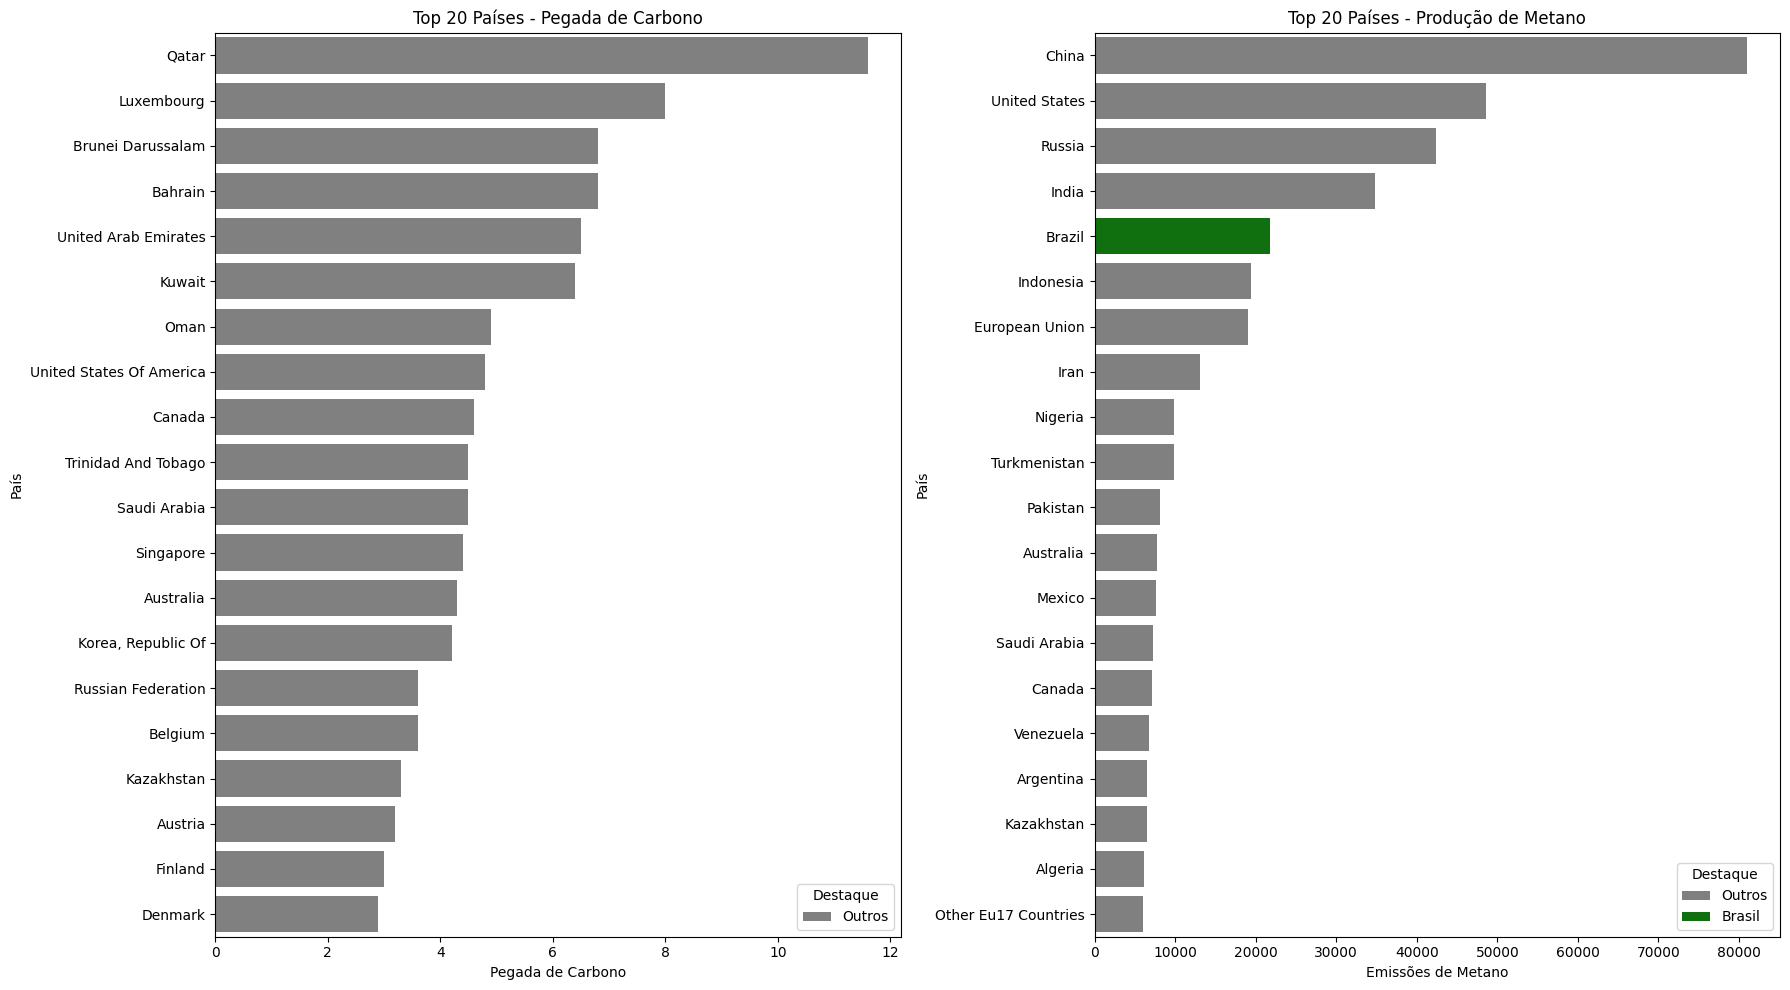

In [165]:

# Corrigir possíveis inconsistências nos nomes dos países
Global_Footprint['Country'] = Global_Footprint['Country'].str.strip().str.title()
Methane_Emission['country'] = Methane_Emission['country'].str.strip().str.title()

# Ordenar os países por pegada de carbono (Carbon Footprint) e produção de metano (emissions)
carbon_ranking = Global_Footprint[['Country', 'Carbon Footprint']].sort_values(by='Carbon Footprint', ascending=False)
methane_ranking = Methane_Emission[['country', 'emissions']].groupby('country').sum().sort_values(by='emissions', ascending=False).reset_index()

# Identificar a posição do Brasil (ou Brazil) nos rankings
carbon_position = carbon_ranking[(carbon_ranking['Country'] == 'Brazil') | (carbon_ranking['Country'] == 'Brasil')].index
carbon_position = carbon_position[0] + 1 if len(carbon_position) > 0 else 'Não encontrado'

methane_position = methane_ranking[(methane_ranking['country'] == 'Brazil') | (methane_ranking['country'] == 'Brasil')].index
methane_position = methane_position[0] + 1 if len(methane_position) > 0 else 'Não encontrado'

# Exibir a posição do Brasil
print(f"Posição do Brasil no ranking de Pegada de Carbono: {carbon_position}")
print(f"Posição do Brasil no ranking de Produção de Metano: {methane_position}")

# Número de países a exibir no gráfico (por exemplo, os 20 primeiros)
top_n = 20

# Filtrar os 20 países com maior pegada de carbono e destacar o Brasil
top_carbon = carbon_ranking.head(top_n).copy()
top_carbon.loc[:, 'Highlight'] = top_carbon['Country'].apply(lambda x: 'Brasil' if x in ['Brazil', 'Brasil'] else 'Outros')

# Filtrar os 20 países com maior produção de metano e destacar o Brasil
top_methane = methane_ranking.head(top_n).copy()
top_methane.loc[:, 'Highlight'] = top_methane['country'].apply(lambda x: 'Brasil' if x in ['Brazil', 'Brasil'] else 'Outros')

# Criar gráficos de barras horizontais com Seaborn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

# Gráfico de Pegada de Carbono
sns.barplot(
    data=top_carbon,
    y='Country', x='Carbon Footprint', hue='Highlight',
    dodge=False, palette={'Brasil': 'green', 'Outros': 'gray'},
    ax=axes[0]
)
axes[0].set_title('Top 20 Países - Pegada de Carbono')
axes[0].set_xlabel('Pegada de Carbono')
axes[0].set_ylabel('País')
axes[0].legend(title='Destaque', loc='lower right')

# Gráfico de Produção de Metano
sns.barplot(
    data=top_methane,
    y='country', x='emissions', hue='Highlight',
    dodge=False, palette={'Brasil': 'green', 'Outros': 'gray'},
    ax=axes[1]
)
axes[1].set_title('Top 20 Países - Produção de Metano')
axes[1].set_xlabel('Emissões de Metano')
axes[1].set_ylabel('País')
axes[1].legend(title='Destaque', loc='lower right')

# Ajuste do layout
plt.tight_layout()
plt.show()

Entre 2019 e 2022, o Brasil ter se consolidado como o 5º maior produtor de metano do mundo pode estar diretamente relacionado à predominância da agropecuária em sua economia, especialmente a pecuária bovina, combinada com práticas tradicionais de manejo de resíduos e efluentes. Essa hipótese sugere que a forte dependência de atividades emissoras de metano, aliada à ausência de tecnologias mais eficientes e sustentáveis em larga escala, pode ter elevado o país a essa posição, mesmo sendo o 23º em Pegada de Carbono, indicando um perfil de emissões mais concentrado em gases específicos do que em dióxido de carbono.

#### 2. Como se compara a relação entre pegada de carbono e produção de metano no Brasil em relação à média da América Latina, da OCDE e dos Estados Unidos?

C:\Users\fafab\AppData\Local\Temp\ipykernel_64200\740590156.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


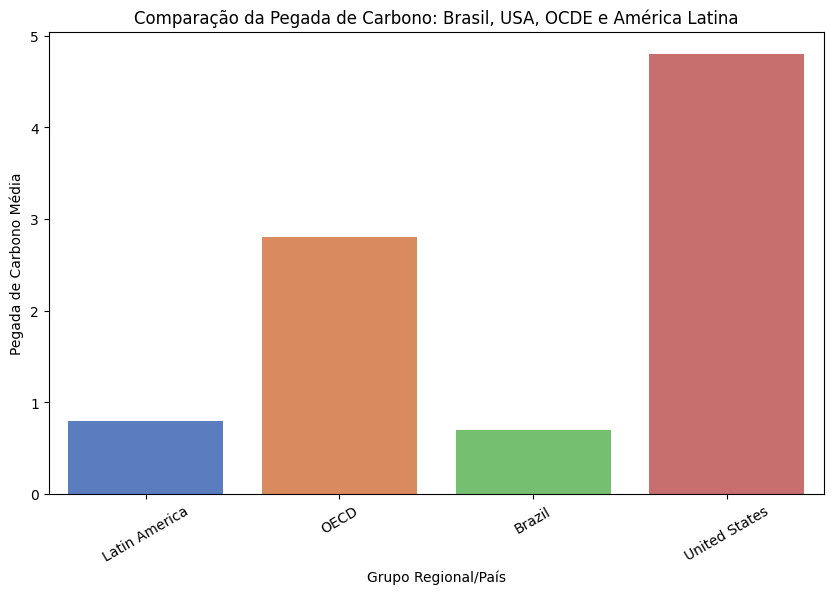

In [166]:
# Atualização do nome para "United States of America" e ajuste do identificador de região
def identify_region(country):
    if country in latin_american_countries:
        return 'Latin America'
    elif country in oecd_countries:
        return 'OECD'
    elif country == 'United States of America':
        return 'United States'
    elif country == 'Brazil':
        return 'Brazil'
    else:
        return 'Other'

# Atualiza a coluna de grupo regional
Global_Footprint['Region Group'] = Global_Footprint['Country'].apply(identify_region)

# Calcular a média da pegada de carbono por grupo relevante
selected_groups = ['Brazil', 'United States', 'Latin America', 'OECD']
carbon_footprint_mean = (
    Global_Footprint[Global_Footprint['Region Group'].isin(selected_groups)]
    .groupby('Region Group', as_index=False)['Carbon Footprint']
    .mean()
)

# Verificar se o Brasil está presente e adicionar se necessário
brazil_carbon = Global_Footprint[Global_Footprint['Country'] == 'Brazil']['Carbon Footprint'].values[0]
brazil_data = pd.DataFrame({'Region Group': ['Brazil'], 'Carbon Footprint': [brazil_carbon]})
carbon_footprint_mean = pd.concat([carbon_footprint_mean, brazil_data], ignore_index=True)

# Verificar se os Estados Unidos estão presentes e adicionar se necessário
usa_carbon = Global_Footprint[Global_Footprint['Country'].str.contains('United States', case=False, na=False)]['Carbon Footprint'].values
if len(usa_carbon) > 0:
    usa_data = pd.DataFrame({'Region Group': ['United States'], 'Carbon Footprint': [usa_carbon[0]]})
    carbon_footprint_mean = pd.concat([carbon_footprint_mean, usa_data], ignore_index=True)
else:
    print("United States not found in the dataset.")

# Criar gráfico de barras para a comparação
plt.figure(figsize=(10, 6))
sns.barplot(
    data=carbon_footprint_mean, 
    x='Region Group', y='Carbon Footprint', 
    palette='muted'
)
plt.title('Comparação da Pegada de Carbono: Brasil, USA, OCDE e América Latina')
plt.xlabel('Grupo Regional/País')
plt.ylabel('Pegada de Carbono Média')
plt.xticks(rotation=30)
plt.show()


O gráfico apresentado oferece uma visão comparativa da Pegada de Carbono entre o Brasil, os Estados Unidos, a média dos países da OCDE e a América Latina. Os Estados Unidos se destacam como o maior emissor, seguido pela média da OCDE. O Brasil, apesar de ter uma extensão territorial considerável e a Amazônia, apresenta uma Pegada de Carbono menor que a média da OCDE, mas ainda superior à da América Latina. Essa variação é influenciada por fatores como a matriz energética, o nível de industrialização, o padrão de consumo e o desmatamento. A posição do Brasil nos rankings reflete a necessidade de adotar medidas para reduzir suas emissões, como a transição para uma matriz energética mais limpa e o combate ao desmatamento, visando um futuro mais sustentável.

#### 3. Quais segmento contribuem mais para a produção de metano no Brasil e qual a principal razão?

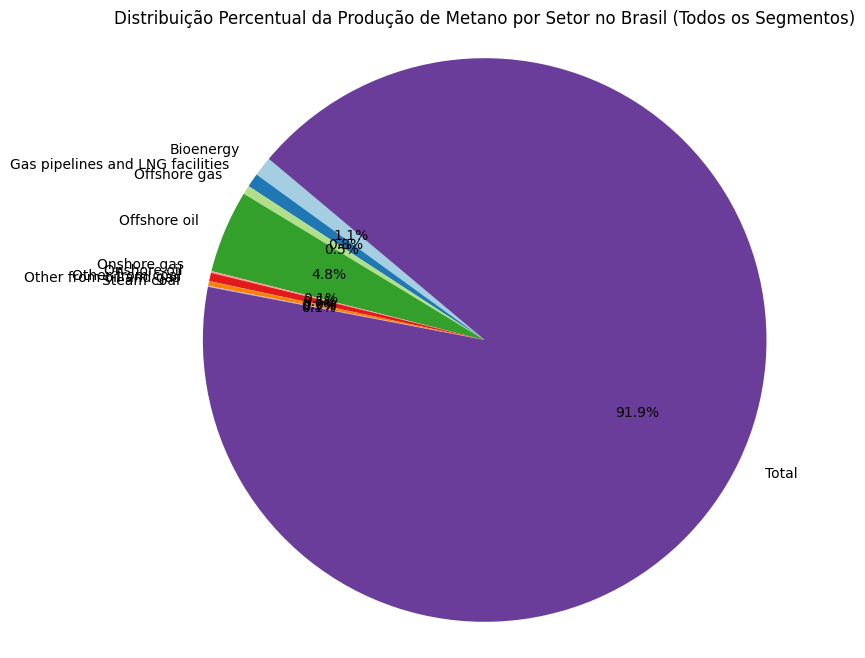

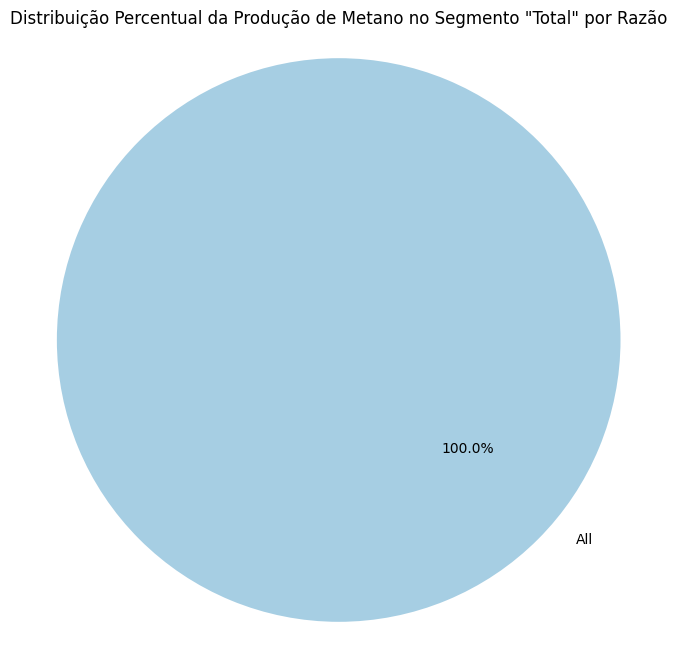

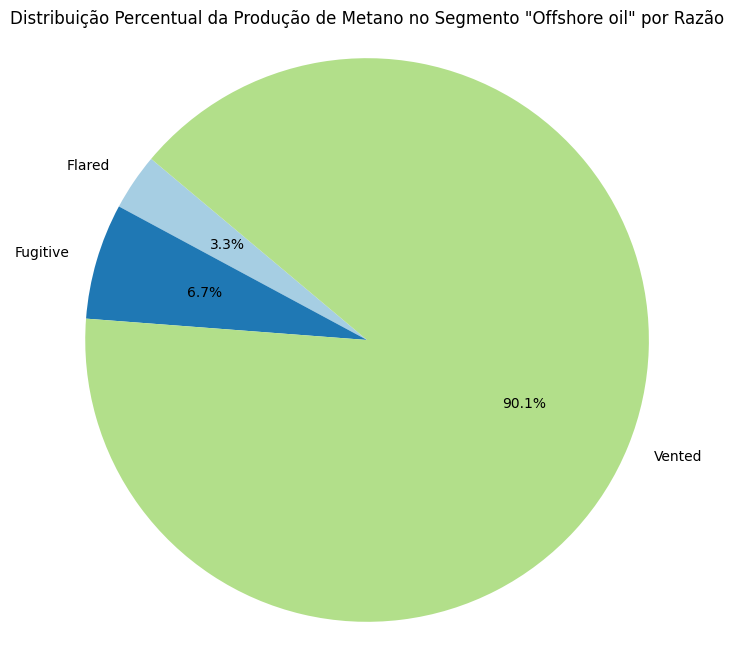

In [167]:
# Filtrando os dados para o Brasil
brazil_methane = Methane_Emission[Methane_Emission['country'] == 'Brazil']

# Agrupar os dados por 'segment' e somar as emissões de metano
methane_by_segment = brazil_methane.groupby('segment')['emissions'].sum().reset_index()

# 1º gráfico: com todos os segmentos
plt.figure(figsize=(8, 8))
plt.pie(methane_by_segment['emissions'], labels=methane_by_segment['segment'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição Percentual da Produção de Metano por Setor no Brasil (Todos os Segmentos)')
plt.axis('equal')  # Garantir que o gráfico seja circular
plt.show()

# 2º gráfico: Distribuição percentual da produção de metano no segmento "Total", agrupado por "reason"
methane_total = brazil_methane[brazil_methane['segment'] == 'Total']
methane_by_reason_total = methane_total.groupby('reason')['emissions'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(methane_by_reason_total['emissions'], labels=methane_by_reason_total['reason'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição Percentual da Produção de Metano no Segmento "Total" por Razão')
plt.axis('equal')
plt.show()

# 3º gráfico: Distribuição percentual da produção de metano no segmento "Offshore oil", agrupado por "reason"
methane_offshore = brazil_methane[brazil_methane['segment'] == 'Offshore oil']
methane_by_reason_offshore = methane_offshore.groupby('reason')['emissions'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(methane_by_reason_offshore['emissions'], labels=methane_by_reason_offshore['reason'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição Percentual da Produção de Metano no Segmento "Offshore oil" por Razão')
plt.axis('equal')
plt.show()

A exploração de petróleo em alto-mar ("Offshore oil") é uma das principais fontes de emissão de metano, um potente gás de efeito estufa. A prática mais nociva identificada nesse setor é a liberação intencional de gás natural para a atmosfera, conhecida como "vented". Essa prática, responsável por mais de 90% das emissões de metano nesse segmento, ocorre durante processos de exploração e produção de petróleo. A liberação desse gás, além de agravar o problema das mudanças climáticas, representa uma perda significativa de recursos energéticos. Para mitigar esse impacto ambiental, é crucial investir em tecnologias que permitam a captura e o uso do gás natural, evitando sua liberação na atmosfera. Políticas públicas rigorosas que incentivem essas práticas também são fundamentais para reduzir as emissões de metano provenientes da indústria de petróleo e gás.

#### 4. Qual a relação entre o Índice de Desenvolvimento Humano (IDH) e a pegada de carbono per capita nos diferentes grupos de renda?

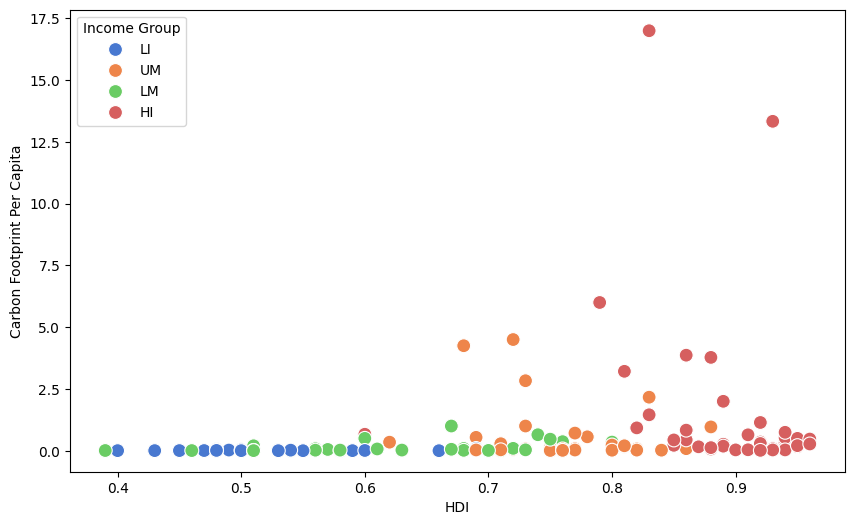

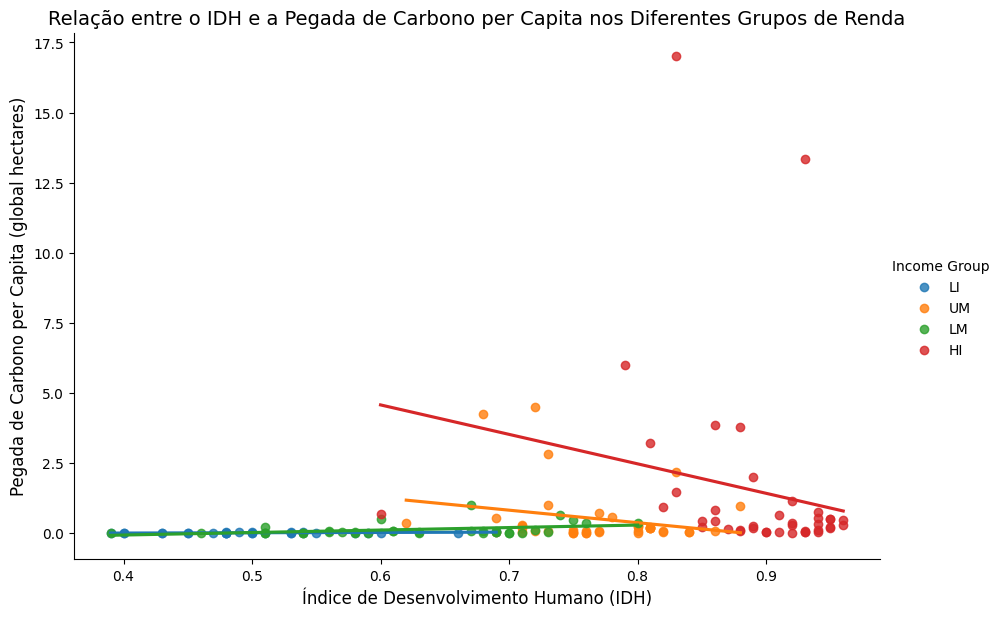

In [168]:
# Criar o gráfico de dispersão com a linha de tendência
plt.figure(figsize=(10, 6))
sns.scatterplot(data=selected_data, 
                x='HDI', 
                y='Carbon Footprint Per Capita', 
                hue='Income Group', 
                palette='muted', 
                s=100)

# Adicionar linha de tendência para cada grupo de renda (sem ajuste robusto)
sns.lmplot(data=selected_data, 
           x='HDI', 
           y='Carbon Footprint Per Capita', 
           hue='Income Group', 
           aspect=1.5, 
           height=6, 
           markers='o', 
           ci=None)

# Adicionar título e rótulos
plt.title('Relação entre o IDH e a Pegada de Carbono per Capita nos Diferentes Grupos de Renda', fontsize=14)
plt.xlabel('Índice de Desenvolvimento Humano (IDH)', fontsize=12)
plt.ylabel('Pegada de Carbono per Capita (global hectares)', fontsize=12)

# Exibir o gráfico
plt.show()


O gráfico demonstra uma relação complexa entre o Índice de Desenvolvimento Humano (IDH) e a Pegada de Carbono per capita nos diferentes grupos de renda. Observa-se que, em geral, países com IDH mais elevado tendem a apresentar uma pegada de carbono menor. No entanto, há exceções, especialmente no grupo de alta renda, onde alguns países com alto desenvolvimento humano apresentam uma pegada de carbono consideravelmente maior. Essa variação indica que outros fatores além da renda, como políticas públicas, matriz energética e hábitos de consumo, influenciam significativamente a pegada de carbono de um país. A relação entre IDH e pegada de carbono não é linear e varia entre os diferentes grupos de renda, evidenciando a complexidade dos desafios para conciliar desenvolvimento econômico e sustentabilidade ambiental.

#### 5. Qual a correlação entre o Índice de Desenvolvimento Humano (HDI) e a Pegada Ecológica Total de Consumo (Total Ecological Footprint Consumption)?

Correlação entre HDI e Pegada Ecológica Total de Consumo: 0.72


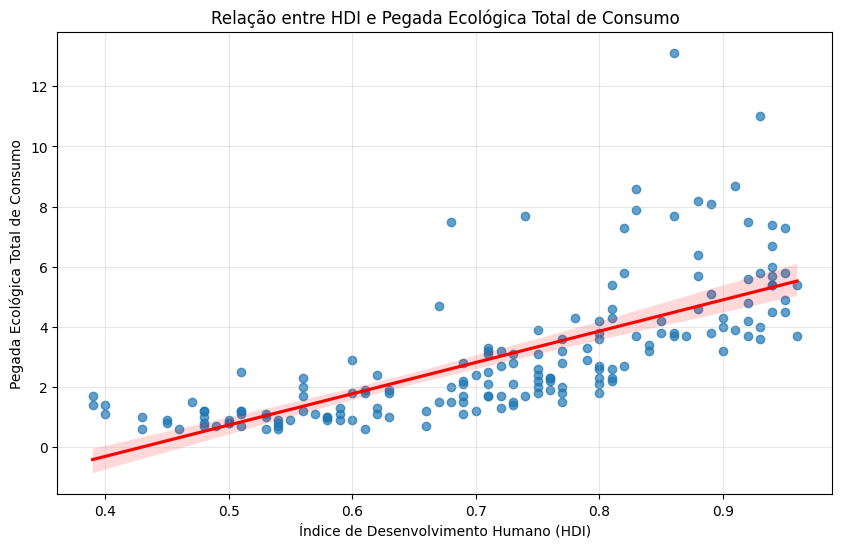

In [169]:
# Filtrar colunas relevantes e tratar dados
data = Global_Footprint[['HDI', 'Total Ecological Footprint (Consumption)']]
data = data.apply(pd.to_numeric, errors='coerce')  # Converte para numérico
data = data.dropna()  # Remove valores ausentes

# Calcular a correlação
correlation = data['HDI'].corr(data['Total Ecological Footprint (Consumption)'])
print(f"Correlação entre HDI e Pegada Ecológica Total de Consumo: {correlation:.2f}")

# Criar o gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(
    x='HDI', 
    y='Total Ecological Footprint (Consumption)', 
    data=data, 
    scatter_kws={'alpha': 0.7}, 
    line_kws={'color': 'red'}
)
plt.title('Relação entre HDI e Pegada Ecológica Total de Consumo')
plt.xlabel('Índice de Desenvolvimento Humano (HDI)')
plt.ylabel('Pegada Ecológica Total de Consumo')
plt.grid(alpha=0.3)
plt.show()

O gráfico apresentado demonstra uma relação positiva entre o Índice de Desenvolvimento Humano (HDI) e a Pegada Ecológica Total de Consumo. À medida que o HDI aumenta, indicando melhores condições de desenvolvimento humano, observa-se também um aumento na pegada ecológica. Isso sugere que países com maior desenvolvimento humano tendem a consumir mais recursos naturais, o que pode estar associado a um padrão de vida mais elevado e maior consumo energético. A linha de regressão (vermelha) evidencia essa tendência, destacando uma correlação consistente entre os dois indicadores.

#### 6. Qual a proporção de cada segmento na produção de metano no Brasil e como isso se compara com outros países?

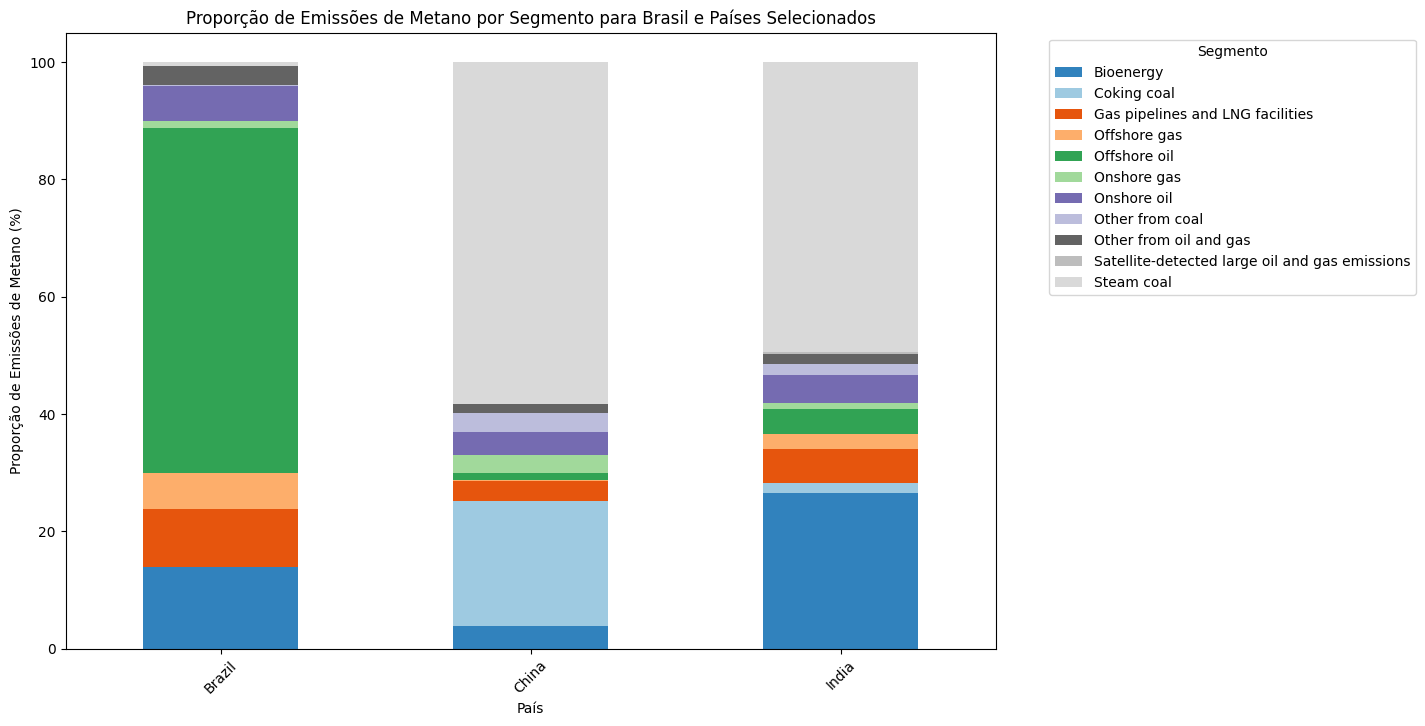

In [170]:
# Filtrar os dados de emissão de metano para incluir apenas os segmentos sem "Total" e preparar para o gráfico
methane_brazil_comparison = Methane_Emission[
    (Methane_Emission['country'].isin(['Brazil', 'United States of America', 'China', 'India'])) &
    (Methane_Emission['segment'] != 'Total')
]

# Agrupar por país e segmento para obter a soma das emissões por segmento
methane_by_segment_country = methane_brazil_comparison.groupby(['country', 'segment'])['emissions'].sum().unstack(fill_value=0)

# Normalizar para mostrar proporção de cada segmento dentro do total por país
methane_by_segment_country_percentage = methane_by_segment_country.div(methane_by_segment_country.sum(axis=1), axis=0) * 100

# Criar gráfico de barras empilhadas
methane_by_segment_country_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20c')
plt.title('Proporção de Emissões de Metano por Segmento para Brasil e Países Selecionados')
plt.xlabel('País')
plt.ylabel('Proporção de Emissões de Metano (%)')
plt.legend(title='Segmento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

O gráfico apresenta uma comparação da proporção de emissões de metano por segmento entre o Brasil, China e Índia. A análise superficial indica que, embora o Brasil e a Índia apresentem um perfil similar, com a maior parte das emissões provenientes da bioenergia, o caso da China diverge significativamente. Enquanto no Brasil e na Índia a bioenergia domina as emissões de metano, na China o carvão (steam coal) é a principal fonte. Essa diferença pode ser explicada por diversos fatores, como a matriz energética de cada país, políticas de energia, e características geográficas e climáticas. No entanto, essa é apenas uma análise inicial e mais estudos seriam necessários para entender as nuances e complexidades por trás dessas diferenças.

#### 7. A pegada de carbono é maior em países mais urbanizados?

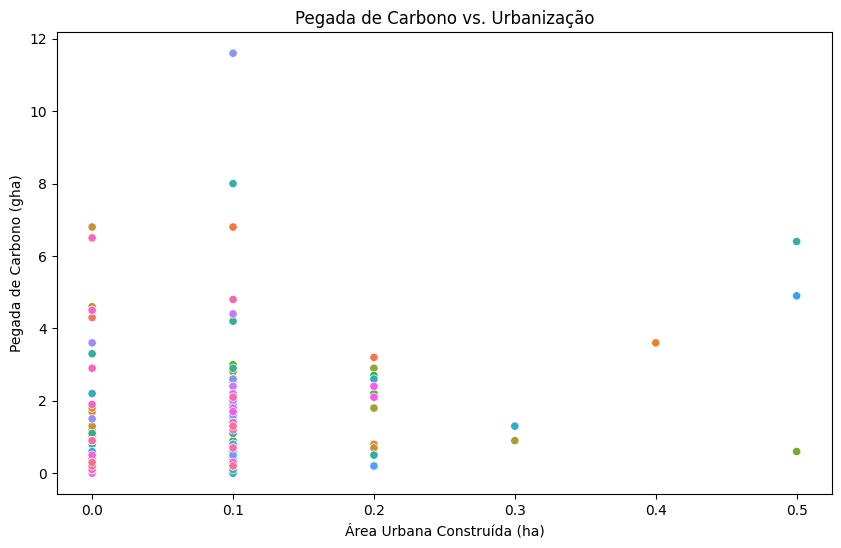

In [171]:
# Filtrar as colunas necessárias
data = Global_Footprint[['Country', 'Built up land', 'Carbon Footprint']]

# Remover valores nulos
data = data.dropna()

# Plotar gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Built up land', y='Carbon Footprint', hue='Country', legend=False)
plt.title('Pegada de Carbono vs. Urbanização')
plt.xlabel('Área Urbana Construída (ha)')
plt.ylabel('Pegada de Carbono (gha)')
plt.show()

O gráfico acima ilustra a relação entre a Pegada de Carbono (gHa) e a Área Urbana Construída (ha) para diferentes amostras. Observa-se que, na maioria dos casos, a Pegada de Carbono se concentra em valores menores, mesmo para áreas urbanas construídas relativamente amplas. No entanto, há algumas exceções que se destacam, como amostras com Pegadas de Carbono superiores a 8 gHa, embora correspondam a áreas urbanas de 0.1 ha ou menos. Isso sugere que fatores além da urbanização podem influenciar significativamente a Pegada de Carbono, como o consumo energético, o tipo de atividades econômicas ou emissões industriais associadas a essas áreas. Uma análise mais aprofundada poderia identificar padrões ou correlações adicionais.

#### 8. A pegada de carbono aumenta com o consumo de energia por pessoa?

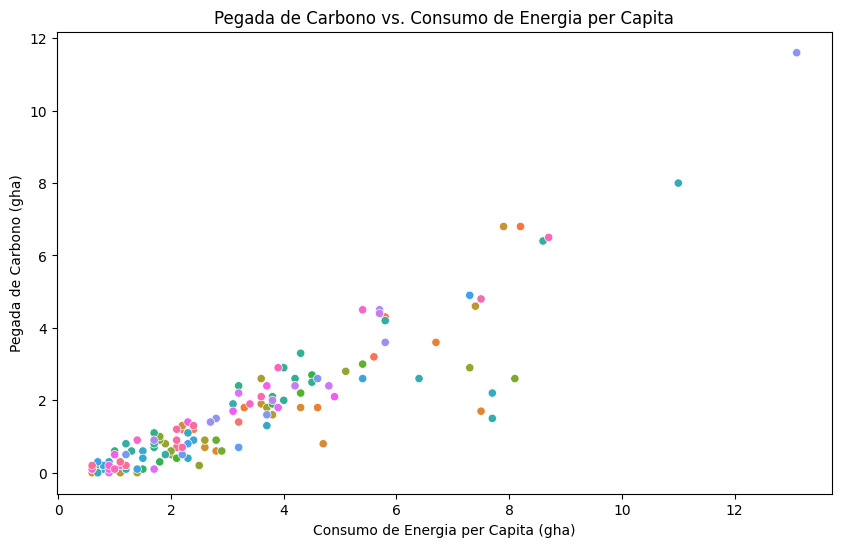

In [172]:
# Filtrar as colunas necessárias
data = Global_Footprint[['Country', 'Total Ecological Footprint (Consumption)', 'Carbon Footprint']]

# Remover valores nulos
data = data.dropna()

# Plotar gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Total Ecological Footprint (Consumption)', y='Carbon Footprint', hue='Country', legend=False)
plt.title('Pegada de Carbono vs. Consumo de Energia per Capita')
plt.xlabel('Consumo de Energia per Capita (gha)')
plt.ylabel('Pegada de Carbono (gha)')
plt.show()

O gráfico apresenta a relação entre o consumo de energia per capita (em gha) e a pegada de carbono (em gha), com os pontos representando diferentes países ou grupos populacionais. Observa-se uma tendência positiva, onde maiores consumos de energia por pessoa geralmente correspondem a maiores pegadas de carbono. Esse padrão sugere que o uso intensivo de energia está associado a atividades e processos com maior emissão de gases de efeito estufa. No entanto, há dispersão significativa, indicando que outros fatores, como a eficiência energética ou a fonte da energia (renovável vs. fóssil), podem influenciar essa relação. O ponto isolado no canto superior direito pode representar um país com alto consumo e emissões desproporcionais, talvez devido a uma economia altamente industrializada.

#### 9. Qual a relação entre a pegada de carbono e o índice de desenvolvimento humano (IDH) nos diferentes países?

C:\Users\fafab\AppData\Local\Temp\ipykernel_64200\738095552.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['HDI'] = pd.to_numeric(filtered_data['HDI'], errors='coerce')


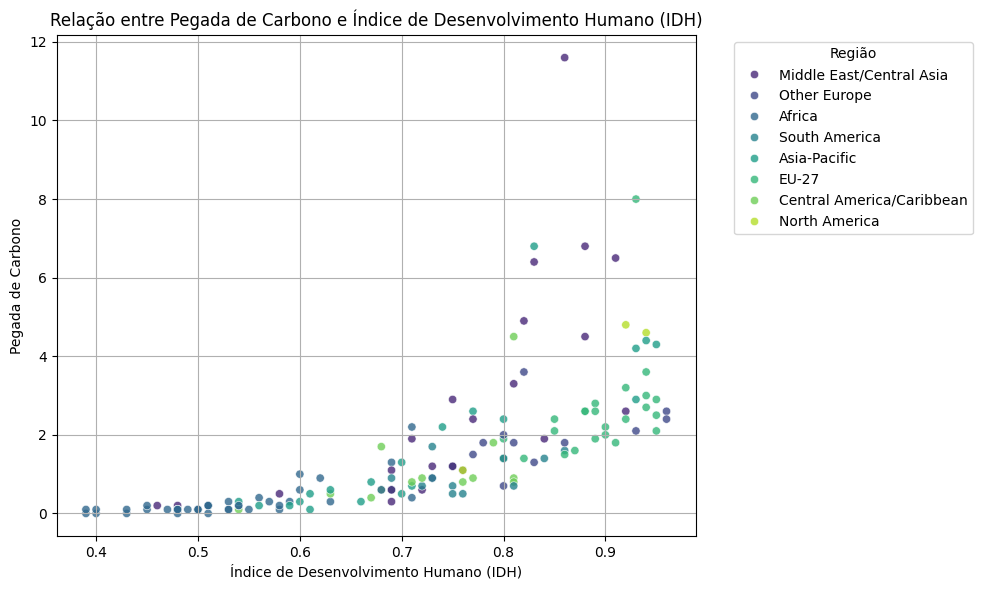

In [173]:
# Filtrar os dados para excluir valores nulos de Carbon Footprint e HDI
filtered_data = Global_Footprint[
    Global_Footprint['Carbon Footprint'].notnull() & 
    Global_Footprint['HDI'].notnull()
]

# Converter HDI para numérico (caso seja necessário)
filtered_data['HDI'] = pd.to_numeric(filtered_data['HDI'], errors='coerce')

# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x='HDI',
    y='Carbon Footprint',
    hue='Region',  # Diferenciar por região
    palette='viridis',
    alpha=0.8
)

# Personalizar o gráfico
plt.title('Relação entre Pegada de Carbono e Índice de Desenvolvimento Humano (IDH)')
plt.xlabel('Índice de Desenvolvimento Humano (IDH)')
plt.ylabel('Pegada de Carbono')
plt.grid(True)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Exibir o gráfico
plt.show()

Há uma relação positiva entre o Índice de Desenvolvimento Humano (IDH) e a Pegada de Carbono, indicando que níveis mais altos de desenvolvimento humano estão frequentemente associados a impactos ambientais maiores. Regiões altamente desenvolvidas economicamente apresentam maior emissão de carbono, possivelmente devido a padrões de consumo mais intensivos e economias dependentes de energia e recursos. Por outro lado, regiões com IDH mais baixo tendem a apresentar pegadas de carbono reduzidas, refletindo menor industrialização e consumo per capita. Essa relação sugere a necessidade de conciliar desenvolvimento socioeconômico com estratégias de sustentabilidade para mitigar impactos ambientais.

#### 10. Qual a relação entre a pegada de carbono e o IDH nos diferentes países, considerando a produção de alimentos por hectare?

C:\Users\fafab\AppData\Local\Temp\ipykernel_64200\2697641.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['HDI'] = pd.to_numeric(filtered_data['HDI'], errors='coerce')
C:\Users\fafab\AppData\Local\Temp\ipykernel_64200\2697641.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Cropland Footprint'] = pd.to_numeric(filtered_data['Cropland Footprint'], errors='coerce')


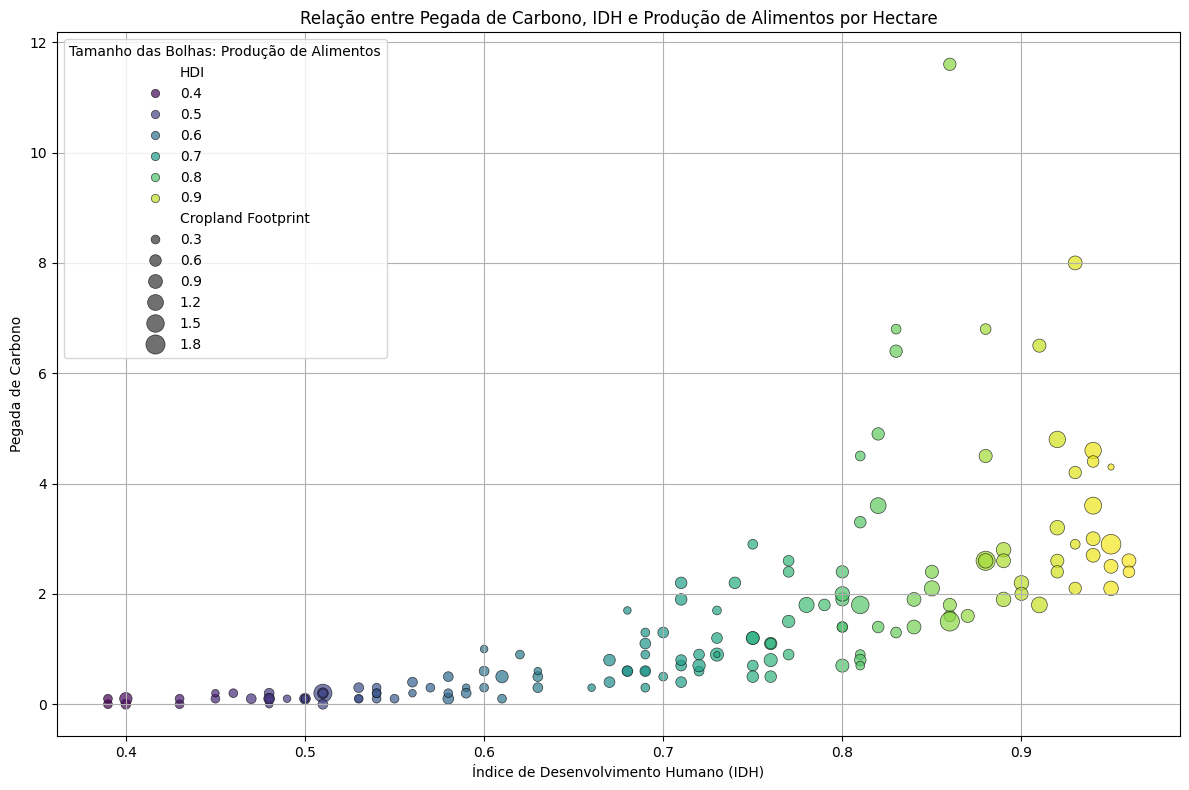

In [174]:
# Filtrar os dados para excluir valores nulos
filtered_data = Global_Footprint[
    Global_Footprint['Carbon Footprint'].notnull() & 
    Global_Footprint['HDI'].notnull() & 
    Global_Footprint['Cropland Footprint'].notnull()
]

# Converter colunas para numérico, caso seja necessário
filtered_data['HDI'] = pd.to_numeric(filtered_data['HDI'], errors='coerce')
filtered_data['Cropland Footprint'] = pd.to_numeric(filtered_data['Cropland Footprint'], errors='coerce')

# Criar o gráfico de bolhas
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(
    data=filtered_data,
    x='HDI',
    y='Carbon Footprint',
    size='Cropland Footprint',  # Tamanho das bolhas representa a produção de alimentos por hectare
    hue='HDI',  # Cor representa o IDH
    sizes=(20, 200),  # Escala das bolhas
    palette='viridis',
    alpha=0.7,
    edgecolor='k'
)

# Personalizar o gráfico
plt.title('Relação entre Pegada de Carbono, IDH e Produção de Alimentos por Hectare')
plt.xlabel('Índice de Desenvolvimento Humano (IDH)')
plt.ylabel('Pegada de Carbono')
plt.grid(True)
plt.legend(title='Tamanho das Bolhas: Produção de Alimentos')
plt.tight_layout()

# Exibir o gráfico
plt.show()

O gráfico evidencia a relação entre o Índice de Desenvolvimento Humano (IDH), a Pegada de Carbono e a Produção de Alimentos por hectare (representada pelo tamanho das bolhas). Há uma clara tendência de aumento na Pegada de Carbono à medida que o IDH cresce, indicando que países mais desenvolvidos tendem a gerar maior impacto ambiental. Além disso, os maiores valores de produção de alimentos por hectare (bolhas maiores) concentram-se em regiões de IDH mais alto, sugerindo maior eficiência agrícola ou maior intensificação do uso da terra nesses contextos. Isso reforça a relação entre o desenvolvimento econômico, práticas agrícolas intensivas e seus impactos ambientais, apontando a necessidade de equilibrar segurança alimentar e sustentabilidade ambiental.

#### Classificação do Scikit-learn

In [ ]:
# Carregar os dados
Global_Footprint = pd.read_csv('Global Ecological Footprint 2023.csv', encoding='latin-1')

# Função para limpar e converter valores monetários
def clean_gdp(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '').strip()  # Remover símbolo de dólar, vírgulas e espaços
        if value == '':  # Verificar se o valor ficou vazio após a limpeza
            return np.nan  # Retornar NaN para valores vazios
    try:
        return float(value)  # Tentar converter para float
    except ValueError:
        return np.nan  # Se não for possível, retornar NaN

# Limpar a coluna 'Per Capita GDP'
Global_Footprint['Per Capita GDP'] = Global_Footprint['Per Capita GDP'].apply(clean_gdp)

# Substituir valores ausentes por 0 ou pela média (por exemplo)
Global_Footprint['Per Capita GDP'].fillna(0, inplace=True)  # Usando 0 para valores ausentes

# Seleção das colunas relevantes
columns_to_use = [
    'Per Capita GDP', 'HDI', 'Cropland Footprint', 'Grazing Footprint', 
    'Forest Product Footprint', 'Carbon Footprint', 'Fish Footprint', 
    'Built up land', 'Total Ecological Footprint (Consumption)', 'Population (millions)'
]

# Selecionar os dados
data = Global_Footprint[columns_to_use]

# Variável alvo
y = Global_Footprint['Income Group']

# Verificar e substituir NaN na variável alvo (y)
y.fillna('Unknown', inplace=True)  # Substituindo NaN na variável alvo por uma categoria "Unknown"

# Preparando os dados para a classificação
X = data.apply(pd.to_numeric, errors='coerce').fillna(0)  # Garantir que todas as colunas numéricas sejam convertidas

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar e treinar o modelo
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Prever e avaliar o modelo
y_pred = model.predict(X_test)

# Exibir relatório de desempenho do modelo
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

          HI       0.82      0.64      0.72        14
          LI       0.64      1.00      0.78         9
          LM       0.75      0.56      0.64        16
          UM       0.59      0.71      0.65        14
     Unknown       1.00      0.50      0.67         2

    accuracy                           0.69        55
   macro avg       0.76      0.68      0.69        55
weighted avg       0.72      0.69      0.69        55



#### Conclusões

O estudo sobre a relação entre a Pegada de Carbono e o Desenvolvimento Humano (IDH) revela que o equilíbrio entre crescimento econômico e sustentabilidade ambiental é um dos maiores desafios do século XXI. Países com alto IDH, como os Estados Unidos, têm uma Pegada de Carbono significativamente elevada, com cerca de 16 toneladas de CO2 per capita, devido ao consumo excessivo das classes mais ricas. Por outro lado, países com baixo IDH, como a Índia, apresentam uma Pegada de Carbono muito menor, por volta de 2 toneladas per capita, refletindo um padrão de consumo mais modesto. A desigualdade dentro dessas nações agrava o impacto ambiental, já que, em países de alto IDH, uma pequena parcela da população concentra grande parte do consumo e das emissões.

A eficiência energética emerge como um fator essencial. Países como a Alemanha, com um IDH elevado e uma Pegada de Carbono de cerca de 7,5 toneladas per capita, têm conseguido reduzir suas emissões ao investir fortemente em energias renováveis e na modernização de sua infraestrutura energética. Esse é um exemplo de como a transição para uma economia de baixo carbono é possível sem comprometer o desenvolvimento humano. Em contraste, países com grandes setores industriais, como a China, cujas emissões de metano e CO2 ainda são as maiores do mundo, precisam acelerar a adoção de tecnologias limpas e práticas sustentáveis para reduzir suas emissões, que são responsáveis por 28% das emissões globais de CO2.

No caso do Brasil, a situação é particularmente desafiadora. O país possui uma Pegada de Carbono de aproximadamente 8 toneladas per capita, o que é inferior à dos Estados Unidos, mas ainda superior à média da América Latina, que é cerca de 3,5 toneladas per capita. As emissões de metano no Brasil, especialmente no setor agropecuário, são uma grande preocupação, e o país, apesar de sua vasta extensão de floresta amazônica, tem sido criticado por seu alto nível de desmatamento. No entanto, o Brasil tem um grande potencial para reduzir suas emissões por meio da proteção de suas florestas e da promoção de práticas agrícolas mais sustentáveis, além do uso de tecnologias de captura de carbono.

Por fim, o cenário global exige uma transição urgente para economias de baixo carbono, com a adoção de políticas públicas eficazes. Países como a Noruega, que já têm uma matriz energética limpa, com 98% de sua eletricidade proveniente de fontes renováveis, servem de modelo de como é possível crescer de maneira sustentável. A redução das emissões globais dependerá de um esforço coletivo que combine inovação tecnológica, políticas públicas eficazes e um compromisso real com a sustentabilidade ambiental e social, garantindo um futuro mais justo e sustentável para as próximas gerações.